In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
from utils import load_saved_model, load_data
from model_evaluation import evaluate_model, display_and_save_confution_matrix

2024-08-10 16:16:03.101029: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
#loading the trained model
model = load_saved_model('../models/model.h5')

2024-08-10 16:16:05.229807: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-08-10 16:16:05.318480: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-10 16:16:05.318530: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.425GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2024-08-10 16:16:05.318561: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-08-10 16:16:05.329282: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-08-10 16:16:05.329410: I tensorflow/str

In [3]:
#loading the datasets
x_test = load_data("../datasets/ready/test/x_test.csv")
y_test = load_data("../datasets/ready/test/y_test.csv")

In [4]:
# Get predictions on the test data
y_pred_test = model.predict(x_test)

2024-08-10 16:16:06.890714: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-08-10 16:16:06.891273: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2495995000 Hz
2024-08-10 16:16:06.973858: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-08-10 16:16:07.993265: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2024-08-10 16:16:07.993426: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [5]:
y_pred_test = (y_pred_test > 0.5).astype(int)
y_pred_test = [y_pred_test[i][0] for i in range(len(x_test))]
print(y_pred_test)
print('\n', y_test['survived'])
test_loss, test_acc, cm, f1, precision, recall = evaluate_model(model, x_test, y_test, y_pred_test)
print(f'Test accuracy: {test_acc}   test_loss: {test_loss}')
print(f'precision: {precision}   recall: {recall}')
print(f' f1: {f1}')

[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]

 0      0
1      0
2      0
3      0
4      0
      ..
174    1
175    0
176    0
177    0
178    1
Name: survived, Length: 179, dtype: int64
6/6 [==============================] - 0s 7ms/step - loss: 0.6700 - accuracy: 0.7542
              precision    recall  f1-score   support

           0       0.76      0.86      0.80       105
           1       0.75      0.61      0.67        74

    accuracy                           0.75       179
   macro avg    

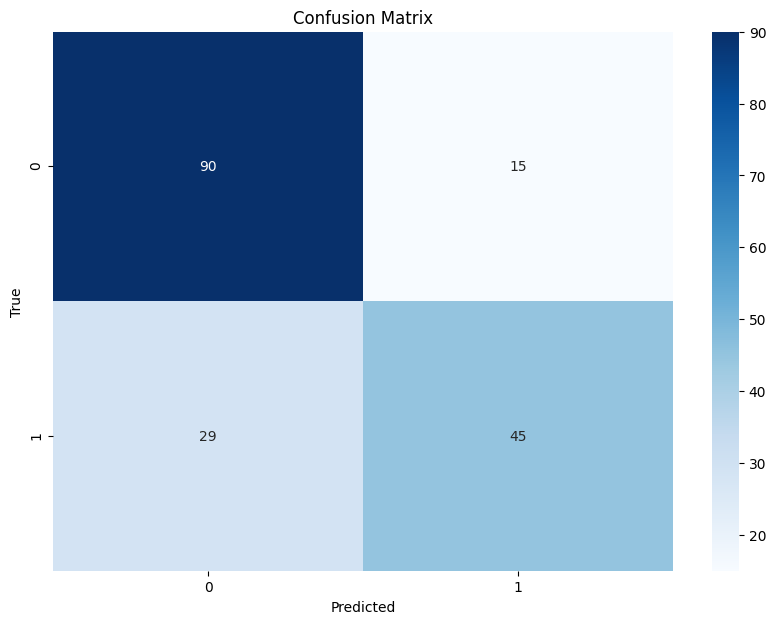

In [6]:
display_and_save_confution_matrix(cm, '../results/cnfusion_matrix.png')